In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N=4096
np.random.seed(42)
n=np.arange(0,N)
k=1150
delay=2056.4
dphase = 2*np.pi*k*delay/N
# print(delay%(2*np.pi))
dk = 300
yr=np.sinc(dk*(n-1000)/N)*np.cos(2*np.pi*k*(n-1000)/N)+0.01*np.random.randn(N)
yi=np.sinc(dk*(n-1000)/N)*np.sin(2*np.pi*k*(n-1000)/N)+0.01*np.random.randn(N)
y=yr+1J*yi
y2r=np.sinc(dk*(n-delay-1000)/N)*np.cos(2*np.pi*k*(n-delay-1000)/N)+0.01*np.random.randn(N)
y2i=np.sinc(dk*(n-delay-1000)/N)*np.sin(2*np.pi*k*(n-delay-1000)/N)+0.01*np.random.randn(N)
y2=y2r+1J*y2i


z=np.zeros(2*N,dtype=y.dtype)
z2=np.zeros(2*N,dtype=y.dtype)
z[:N]=y
z2[:N]=y2
ft = np.fft.fft(z)
ft2=np.fft.fft(z2)

# k=510
# y=np.cos(2*np.pi*k*n/N)+np.random.randn(N)
# y2=np.cos(2*np.pi*k*n/N - dphase)+np.random.randn(N)
# ft1=np.fft.fft(y)
# ft3=np.fft.fft(y2)


/home/mohan/Projects/env/base/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


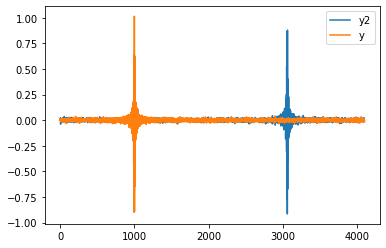

In [4]:
plt.plot(y2.real,label='y2')
plt.plot(y,label='y')# plt.xlim(0,200)
plt.legend()

6136


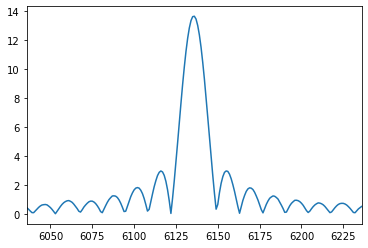

In [5]:
xcorr=ft*np.conj(ft2)

# xcorr2=ft1*np.conj(ft3)
xcorrtime=np.fft.ifft(xcorr)
plt.plot(np.abs(xcorrtime))
a=np.argmax(np.abs(xcorrtime))
plt.xlim(a-100,a+100)
# xx=np.abs(np.fft.ifft(xcorr))
# xx2=np.abs(np.fft.ifft(xcorr2))
print(a)
#width in time ~ N/dk

In [8]:
8192-6136

2056

In [10]:
np.angle(xcorrtime[6136])*4096/(2*np.pi)/1150

0.4023805323021797

In [ ]:
np.angle(xcorr)